## Car Brand Classification

In [11]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np 
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
image_size = [224,224]
train_p = 'Datasets/Train'
test_p = 'Datasets/Test'

In [3]:
resnet = ResNet50(input_shape=image_size+[3],weights='imagenet',include_top=False)


94773248/94765736 [==============================] - 17s 0us/step


In [4]:
for layer in resnet.layers:
    layer.trainable=False
    

In [5]:
fold = glob('Datasets/Train/*')

In [6]:
x = Flatten()(resnet.output)

In [7]:
pred = Dense(len(fold),activation = 'softmax')(x)


In [8]:
model = Model(inputs=resnet.input,outputs=pred)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
train_data_generator = ImageDataGenerator(rescale=1./255,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip=True)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [14]:
train_set = train_data_generator.flow_from_directory('Datasets/Train',
                                                       target_size=(224,224),
                                                       batch_size=32,
                                                       class_mode='categorical') 

Found 64 images belonging to 3 classes.


In [15]:
test_set = test_data_generator.flow_from_directory('Datasets/Test',
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 58 images belonging to 3 classes.


In [18]:
len(train_set)

2

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    
      def on_epoch_end(self, epoch, logs={}):
            
            if(logs.get('acc')>0.77):
                
            
                  print("\nReached 77.0% accuracy so cancelling training!")
                  self.model.stop_training = True

In [19]:
res = model.fit_generator(train_set,
                         validation_data=test_set,
                         epochs=50,
                         steps_per_epoch = len(train_set),
                         validation_steps = len(test_set))

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 11s 9s/step - loss: 6.0791 - accuracy: 0.3906 - val_loss: 10.6327 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 13s 10s/step - loss: 5.8129 - accuracy: 0.4531 - val_loss: 7.6071 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 13s 9s/step - loss: 3.8928 - accuracy: 0.4375 - val_loss: 1.3290 - val_accuracy: 0.4483
Epoch 4/50
2/2 [==============================] - 13s 9s/step - loss: 2.1247 - accuracy: 0.5000 - val_loss: 4.1163 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 12s 8s/step - loss: 3.5581 - accuracy: 0.4219 - val_loss: 2.7807 - val_accuracy: 0.2586
Epoch 6/50
2/2 [==============================] - 11s 8s/step - loss: 1.9919 - accuracy: 0.4375 - val_loss: 1.8881 - val_accuracy: 0.3621
Epoch 7/50
2/2 [==============================] - 12s 9s/step - loss: 1.8910 - accuracy: 0.4531 - val_loss: 2.3235 - val_accuracy: 0.3276
Epoch 8/50
2/2 [================

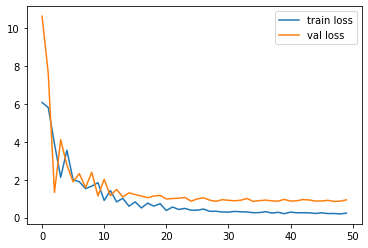

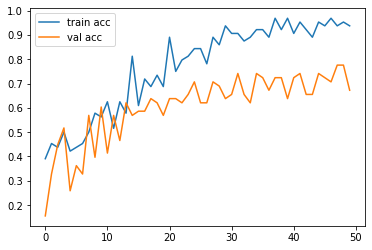

<Figure size 432x288 with 0 Axes>

In [21]:
plt.plot(res.history['loss'], label='train loss')
plt.plot(res.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


plt.plot(res.history['accuracy'], label='train acc')
plt.plot(res.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
from tensorflow.keras.models import load_model
model.save('model_resnet_50.h5')

In [23]:
y_hat = model.predict(test_set)
y_hat

array([[6.00992478e-02, 6.49683595e-01, 2.90217161e-01],
       [2.33572479e-02, 4.45213497e-01, 5.31429291e-01],
       [9.21177983e-01, 2.25997791e-02, 5.62223159e-02],
       [1.52019337e-01, 4.38526750e-01, 4.09453958e-01],
       [3.24512939e-06, 4.54568333e-04, 9.99542236e-01],
       [5.54960780e-02, 8.30562264e-02, 8.61447692e-01],
       [6.01647981e-02, 3.19076449e-01, 6.20758772e-01],
       [7.76323825e-02, 2.82916605e-01, 6.39451027e-01],
       [2.12107435e-01, 3.51878315e-01, 4.36014295e-01],
       [9.77902055e-01, 1.06782252e-02, 1.14196315e-02],
       [1.80380549e-02, 1.76394067e-03, 9.80198026e-01],
       [3.63449985e-03, 9.81014192e-01, 1.53514305e-02],
       [1.57562289e-02, 8.47896039e-02, 8.99454176e-01],
       [7.73029327e-01, 8.35312437e-03, 2.18617499e-01],
       [7.87742622e-03, 8.79518688e-01, 1.12603888e-01],
       [1.12058908e-01, 8.52875412e-01, 3.50657143e-02],
       [5.16937720e-03, 1.47012755e-01, 8.47817838e-01],
       [6.02109097e-02, 6.65310

In [24]:
y_hat=np.argmax(y_hat,axis=1)

In [25]:
y_hat

array([1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2,
       0, 2, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 2, 1], dtype=int64)